# Performance - example

In [122]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

In [117]:
import networkx as nx
import numpy as np
G = nx.DiGraph()
G.add_node(1, capacity = 1)
G.add_node(2, capacity = 1)
G.add_node(3, capacity = 1)
G.add_node(4, capacity = 1)
G.add_node(5, capacity = 1)


G.add_edge(1, 2, capacity=3)
G.add_edge(2, 3, capacity=1)
G.add_edge(3, 4, capacity=3)
G.add_edge(4, 3, capacity=5)
G.add_edge(4, 5, capacity=4)
G.add_edge(1, 4, capacity=2)
G.add_edge(3, 5, capacity=2)
G.add_edge(5, 2, capacity=3)
G.add_edge(1, 5, capacity=3)

G = G.to_undirected()

In [132]:
Performance(G)

308

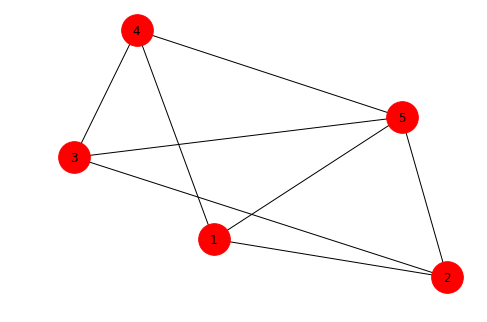

In [42]:
nx.draw(G,with_labels = True, node_size=1000,pos=nx.spring_layout(G))
plt.show()

In [134]:
def Performance(G):
    def capacity_b(Graph):
        return np.array(np.repeat(1,len(Graph)))

    def get_max_flow_demand(G):
        results = []
        max_flow = 0
        for i in G:
            for j in G:
                if (i == j):
                    continue
                else:
                    flow = nx.maximum_flow_value(G,i,j)
                    flow = int(flow)
                    results.append(flow)
        return results


    def fill_routing_matrix(route_graph):
        routing_matrix = np.array(np.repeat(0, len(route_graph)))
        # for each node in the graph calculate their standard shortest path routing with dijkstra
        for n in route_graph:
            all_path = nx.single_source_dijkstra_path(route_graph, n)     
            # for each shortest path for one node in the graph define an array with n elements
            # the element in the array is 1 when the shortest path flows through the node
            # otherwise 0
            for path in all_path:
                tmp = np.array(np.repeat(0, len(route_graph)))
                for path_element in all_path[path]:

                    node_idx = 0
                    for link in route_graph:       
                        if(path_element == link):
                            tmp[node_idx] = 1
                            continue 
                        node_idx += 1      
                # add each shortest path transformed into an array tmp to the routing matrix 
                if len(tmp) == len(route_graph):         
                    routing_matrix = np.vstack([routing_matrix, tmp])          
        return routing_matrix


    b = capacity_b(G)    
    R_fl = fill_routing_matrix(G)              
    R_lf = np.transpose(R_fl)
    x = np.array(np.repeat(1, len(R_fl)))  
    Rx = np.dot(R_lf,x)
    rho = 2
    x = get_max_flow_demand(G)
    Performance = rho*sum(x)
    return Performance

In [133]:
Performance(G)

308